In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2021-01-27'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nb_train = 50
nb_test = 10
krnlinit = 'rdn'
nblay = 3
nbclust = 4
filt = 2

# Spatial Jitter only on the classification

In [5]:
def makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic):
    if pooling:
        hotshom = poolingnetwork(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    else:
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}_{jitonic}'
    fname_model = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}_model.pkl'
    print(fname_model)
    if not os.path.isfile(fname_model):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname_model, 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname_model, 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):       
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train, jitonic=jitonic)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test, jitonic=jitonic)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


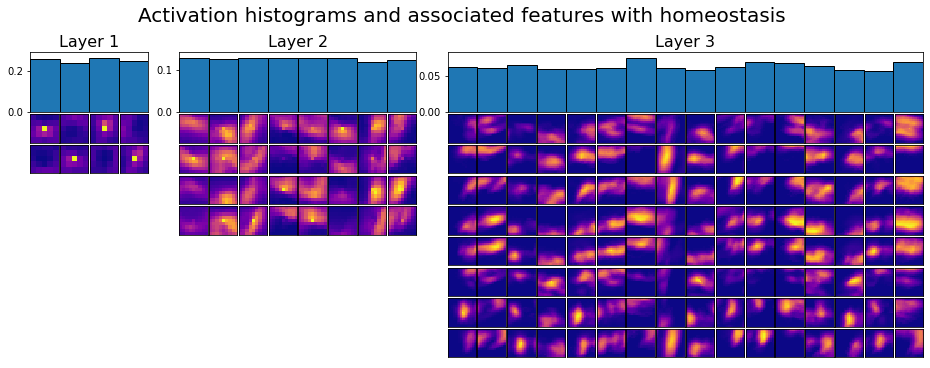

spatial jitter -> var = 10
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/



spatial jitter -> var = 10
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/



-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 50.0% - eucli = 60.0% - norm = 60.0%
Classification scores with kNN: 3-NN = 40.0% - 6-NN = 40.0%
Classification scores with entropy: Kullback-Leibler = 50.0% - Jensen-Shannon = 50.0%
----------------------------------------------------------------------------------------------------


In [6]:
for i in [0.5, 1, 2, 5, 10, 20, 50, 100, 500]:
    jitonic = [i,None]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);

In [ ]:
for i in [1, 2, 3, 4, 5, 10]:
    jitonic = [None,i]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);